<a href="https://colab.research.google.com/github/7330717512/News_Category_Classification/blob/main/News_category_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/news-data.csv')

In [ ]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
df.tail()

,category,text
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...
2224,sport,souness delight at euro progress boss graeme s...


In [ ]:
df.shape

(2225, 2)

In [ ]:
category_valuecounts = df.groupby(['category'])['text'].count().reset_index()

In [ ]:
category_valuecounts

,category,text
0,business,510
1,entertainment,386
2,politics,417
3,sport,511
4,tech,401


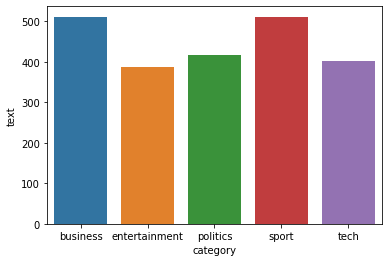

In [ ]:
sns.barplot(x='category',y='text',data=category_valuecounts)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [ ]:
df.isnull().sum()

category    0
text        0
dtype: int64

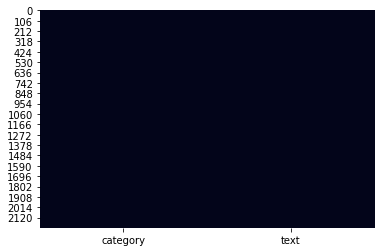

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df = df.drop_duplicates()
df.shape

(2126, 2)

In [ ]:
df.tail()

,category,text
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...
2224,sport,souness delight at euro progress boss graeme s...


In [ ]:
df = df.reset_index()

In [ ]:
df.drop('index',inplace=True,axis=1)

In [ ]:
df.tail()

,category,text
2121,business,cars pull down us retail figures us retail sal...
2122,politics,kilroy unveils immigration policy ex-chatshow ...
2123,entertainment,rem announce new glasgow concert us band rem h...
2124,politics,how political squabbles snowball it s become c...
2125,sport,souness delight at euro progress boss graeme s...


In [ ]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
corpus = []
for i in range(0, len(df)):
  text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
  text = text.lower()
  text = ' '.join((word) for word in text.split() if word not in stopwords.words('english'))
  corpus.append(text)

**CountVectorizer(Bag of Words)**





In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=2000)

X_bow = bow.fit_transform(corpus).toarray()

In [ ]:
X_bow[4:9]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y=df.category

In [ ]:
from sklearn.model_selection import train_test_split
X_train_bow,X_test_bow,y_train,y_test = train_test_split(X_bow,y,test_size=0.2,random_state=42)

Logistic Regression

In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver='saga',max_iter=500)

lr.fit(X_train_bow,y_train)
y_pred1 = lr.predict(X_test_bow)

print("******** LogisticRegression ********")
print(f'Accuracy is : {accuracy_score(y_pred1,y_test)}')

******** LogisticRegression ********
Accuracy is : 0.9647887323943662


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

mnb.fit(X_train_bow,y_train)
y_pred2 = mnb.predict(X_test_bow)

print("******** MultinomialNB ********")
print(f'Accuracy is : {accuracy_score(y_pred2,y_test)}')

******** MultinomialNB ********
Accuracy is : 0.9788732394366197


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred3 = rf.predict(X_test_bow)

print("******** RandomForestClassifier ********")
print(f'Accuracy is : {accuracy_score(y_pred3,y_test)}')

******** RandomForestClassifier ********
Accuracy is : 0.9577464788732394


XGboost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(X_train_bow,y_train)
y_pred4 = xgb.predict(X_test_bow)

print("******** XGBClassifier ********")
print(f'Accuracy is : {accuracy_score(y_pred4,y_test)}')

******** XGBClassifier ********
Accuracy is : 0.9460093896713615


Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train_bow,y_train)
y_pred5 = svc.predict(X_test_bow)

print("*******SVC*******")
print(f'Accuracy is: {accuracy_score(y_pred5,y_test)}')

*******SVC*******
Accuracy is: 0.9483568075117371


**Tf-Idf Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2000,ngram_range=(1,2))

X_tfidf = tfidf.fit_transform(corpus).toarray()

In [ ]:
X_tfidf[4:9]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02917743, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
X_tfidf.shape

(2126, 2000)

In [ ]:
y = df.category

In [ ]:
y

0                tech
1            business
2               sport
3               sport
4       entertainment
            ...      
2121         business
2122         politics
2123    entertainment
2124         politics
2125            sport
Name: category, Length: 2126, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf,y,test_size = 0.2, random_state = 42)

In [ ]:
X_train_tfidf.shape , X_test_tfidf.shape

((1700, 2000), (426, 2000))

Logistic Regression after tfidf

In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()

lr.fit(X_train_tfidf,y_train)
y_pred1 = lr.predict(X_test_tfidf)

print("******** LogisticRegression after tfidf********")
print(f'Accuracy is : {accuracy_score(y_pred1,y_test)}')

******** LogisticRegression after tfidf********
Accuracy is : 0.9647887323943662


In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

mnb.fit(X_train_tfidf,y_train)
y_pred2 = mnb.predict(X_test_tfidf)

print("******** MultinomialNB after tfidf********")
print(f'Accuracy is : {accuracy_score(y_pred2,y_test)}')

******** MultinomialNB after tfidf********
Accuracy is : 0.9788732394366197


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_tfidf,y_train)
y_pred3 = rf.predict(X_test_tfidf)

print("******** RandomForestClassifier after tfidf ********")
print(f'Accuracy is : {accuracy_score(y_pred3,y_test)}')

******** RandomForestClassifier after tfidf ********
Accuracy is : 0.9530516431924883


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(X_train_tfidf,y_train)
y_pred4 = xgb.predict(X_test_tfidf)

print("******** XGBClassifier after tfidf********")
print(f'Accuracy is : {accuracy_score(y_pred4,y_test)}')

******** XGBClassifier after tfidf********
Accuracy is : 0.9507042253521126


In [ ]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train_tfidf,y_train)
y_pred5 = svc.predict(X_test_tfidf)

print("*******SVC after tfidf*******")
print(f'Accuracy is: {accuracy_score(y_pred5,y_test)}')

*******SVC after tfidf*******
Accuracy is: 0.9647887323943662


**Using Artificial Neural Networks**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
# from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:
classifier = Sequential()
classifier.add(Dense(units=10, kernel_initializer='he_normal',activation='relu',input_dim=2000))
# classifier.add(Dropout(0.3))
classifier.add(Dense(units=20, kernel_initializer='he_normal',activation='relu'))
# classifier.add(Dropout(0.4))
classifier.add(Dense(units=15, kernel_initializer='he_normal',activation='relu'))
# classifier.add(Dropout(0.2))
classifier.add(Dense(units=4,kernel_initializer='glorot_uniform',activation='softmax'))

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20010     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 64        
Total params: 20,609
Trainable params: 20,609
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train = y_train.replace({'business':1,'entertainment':2,'politics':3,'sport':4,'tech':5})
y_test = y_test.replace({'business':1,'entertainment':2,'politics':3,'sport':4,'tech':5})

In [ ]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

AttributeError: ignored

In [ ]:
model_history=classifier.fit(X_train_bow,y_train,validation_split=0.2, batch_size=10,epochs=100)

Epoch 1/100


ValueError: ignored

Predict on Random text

In [ ]:
pred = mnb.predict(tfidf.transform(['NEW DELHI: Prime Minister Narendra Modi on Friday choked with emotion while thanking doctors, frontline workers during video conference with them. "As a servant of Kashi, I thank everyone in Varanasi, especially the doctors, nurses, technicians, ward boys and ambulance drivers who have done a commendable work," PM said.']))

In [ ]:
print(pred)

['politics']


In [ ]:
pred = mnb.predict(tfidf.transform(["India’s largest public sector bank State Bank of India (SBI) on Friday reported a standalone net profit of Rs 6,450.75 crore for quarter ended March 2021 (Q4FY21) aided by fewer provisions on bad loans. The lender’s PAT was 80.14 per cent higher than previous year’s profit of Rs 3,580.8 crore. On a quarterly basis, the bottom line expanded 24.14 per cent."]))

In [ ]:
print(pred)

['business']


In [ ]:
import pickle
f = open('mnb.pickle', 'wb')
pickle.dump(mnb, f)
f.close()

f = open('tfidf.pickle', 'wb')
pickle.dump(tfidf, f)
f.close()